## Titanic
El RMS Titanic​ fue un transatlántico británico, el mayor barco de pasajeros del mundo al finalizar su construcción, que se hundió desde la noche del 14 a la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. (wikipedia)

## Importar las librerias que usaremos

In [4]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm
from pandas.core import datetools

### Importar nuestro dataset

In [6]:
df = pandas.read_csv('train.csv')

## Completar celdas vacias con el promedio

In [8]:
def imputation(data):
    df_age= data['Age']
    mean_df = np.mean(df_age)
    data['Age'] = data['Age'].fillna(mean_df)
    return data

    # Normalización de características Cuando las características difieren en órdenes de magnitud, el primer escalado de características que realiza puede hacer que el descenso de gradiente converja mucho más rápido

In [9]:
def features_normalize(features):

    sd = np.std(features, axis=0)
    mean = np.mean(features, axis=0)
    x_norm = (features - mean)/sd
    return x_norm

        # Cálculo el costo de una lista de parámetros, theta, dada una lista de características (puntos de datos de entrada) y valores (puntos de datos de salida).

In [10]:
def compute_cost(features, values, theta):

    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)

    return cost

    # Descenso de gradiente dado un conjunto de datos con un número arbitrario de características.
El descenso de gradiente es un algoritmo de optimización iterativo de primer orden para encontrar un mínimo local de una función diferenciable. Para encontrar un mínimo local de una función usando el descenso de gradiente, tomamos pasos proporcionales al negativo del gradiente de la función en el punto actual

In [11]:
def gradient_descent(features, values, theta, alpha, num_iterations):


    m = len(values)
    cost_history = []
    for i in range(num_iterations):
        prediction_values = np.dot(features, theta)
        theta = theta - alpha/m * np.dot(np.transpose(features), (prediction_values-values))
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, pandas.Series(cost_history)

        # Calculo de coeficiente de determinación, R^2, 

El coeficiente de determinación se puede considerar como un porcentaje. Le da una idea de cuántos puntos de datos caen dentro de los resultados de la línea formada por la ecuación de regresión. 

Cuanto mayor sea el coeficiente, mayor será el porcentaje de puntos por los que pasa la línea cuando se trazan los puntos de datos y la línea. 

Si el coeficiente es 0,80, entonces el 80% de los puntos deben caer dentro de la línea de regresión.

Los valores de 1 o 0 indicarían que la línea de regresión representa todos o ninguno de los datos, respectivamente. Un coeficiente más alto es un indicador de una mejor bondad de ajuste para las observaciones.

In [12]:
def compute_r_squared(data, predictions):
    mean = np.mean(data)
    sum_of_square_errors = np.square(data - predictions).sum()
    sum_of_square_data =  np.square(data - mean).sum()
    r_squared = 1- sum_of_square_errors/sum_of_square_data
    return r_squared

In [31]:
def prediction_grad_dic(dfa):
    df = imputation(dfa)
    
    # Seleccionar distintas caracteristicas
    features = df[['Pclass', 'Age', 'SibSp', 'Parch']]
    
    
    # Agregue fecha a características usando variables ficticias
    dummy_units = pandas.get_dummies(df['Sex'], prefix='sex')
    features = features.join(dummy_units)
    #valores dummy
    # Valores
    values = df['Survived']
    m = len(values)
     
    features = features_normalize(features)
    add_col = features.insert(0, 'x0', 1)
    # Caracteristicas/features ['ones'] = np.ones(m) 
    # Add a column of 1s (y intercept)
    
    # onvertir caracteristicas en arreglos de numpy
    features_array = np.array(features)
    values_array = np.array(values)

    # poner valor de alpha y numero de iteraciones
    alpha = 0.05
    num_iterations = 100 
    
    # Inicializar Thetha la funcion de gradiente descendiente
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    predictions = np.dot(features_array, theta_gradient_descent)
    r_squared = compute_r_squared(values_array, predictions)
    data_pred = pandas.DataFrame(data = predictions)
    feature_array = pandas.DataFrame(data = features_array)
    y = data_pred.round(decimals=0)
    x = y.astype(int)
    return x, theta_gradient_descent, cost_history

         # Valor Alpha
El nivel de significancia, también denotado como alfa o α, es la probabilidad de rechazar la hipótesis nula cuando es verdadera. Por ejemplo, un nivel de significancia de 0.05 indica un riesgo de 5% de concluir que existe una diferencia cuando en realidad no hay ninguna diferencia.

In [14]:
def plot_cost_history(df):
    alpha = 0.05 
    x, theta_gradient_descent, cost_history = prediction_grad_dic(df)
    cost_df = pandas.DataFrame({
        'Cost_History': cost_history,
        'Iteration': range(len(cost_history))})
    plt.figure()
    plt.plot(cost_df['Cost_History'], cost_df['Iteration'])
   
    plt.title('Cost_History vs. Iteration for alpha = %.3f' % alpha)
    plt.xlabel('Iteration')
    plt.ylabel('Cost_History')   
    plt.show()

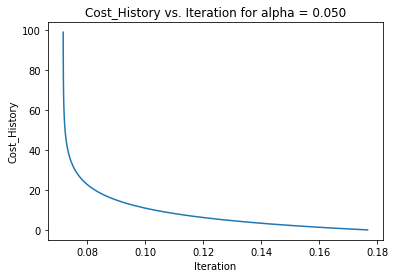

In [15]:
plot_cost_history(df)

In [28]:
prediction_grad_dic(df)

(     0
 0    0
 1    1
 2    1
 3    1
 4    0
 5    0
 6    0
 7    0
 8    1
 9    1
 10   1
 11   1
 12   0
 13   0
 14   1
 15   1
 16   0
 17   0
 18   1
 19   1
 20   0
 21   0
 22   1
 23   0
 24   1
 25   0
 26   0
 27   0
 28   1
 29   0
 ..  ..
 861  0
 862  1
 863  0
 864  0
 865  1
 866  1
 867  0
 868  0
 869  0
 870  0
 871  1
 872  0
 873  0
 874  1
 875  1
 876  0
 877  0
 878  0
 879  1
 880  1
 881  0
 882  1
 883  0
 884  0
 885  0
 886  0
 887  1
 888  1
 889  0
 890  0
 
 [891 rows x 1 columns],
 array([ 0.38156586, -0.14968291, -0.07241564, -0.04405117, -0.01244011,
         0.12338551, -0.12338551]),
 0     0.176673
 1     0.163653
 2     0.152491
 3     0.142883
 4     0.134582
 5     0.127384
 6     0.121122
 7     0.115656
 8     0.110869
 9     0.106665
 10    0.102963
 11    0.099695
 12    0.096803
 13    0.094238
 14    0.091958
 15    0.089929
 16    0.088119
 17    0.086502
 18    0.085055
 19    0.083760
 20    0.082597
 21    0.081554
 22    0.080616


    # Predecir data

In [17]:
def data_predict(dfa):
    global df
    data = imputation(dfa)
    features = data[['Pclass', 'Age', 'SibSp', 'Parch']]
    dummy_units = pandas.get_dummies(data['Sex'], prefix='sex')
    features = features.join(dummy_units)
    features = features_normalize(features)
    add_col = features.insert(0, 'x0', 1)
    features_array = np.array(features)
    x, theta_gradient_descent, cost_history = prediction_grad_dic(df)
    predictions = np.dot(features_array, theta_gradient_descent)
    data_pred = pandas.DataFrame(data = predictions)
    y = data_pred.round(decimals=0)
    x = y.astype(int)
    p = pandas.DataFrame(data['PassengerId'])
    p.insert(1,'Survived',x)
    return p                          

In [24]:
data = pandas.read_csv('test.csv')

In [25]:
data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [21]:
data_rev = data_predict(data)

In [22]:
data_rev.to_csv('predict_test_titanic.csv', index = False)

In [23]:
data_rev

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
393         1285         0
394         1286         0
395         1287         1
396         1288         0
397         1289         1
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         1
404         1296         0
405         1297         0
406         1298         0
407         1299         0
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         1
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]